In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

In [34]:
df = pd.read_csv("Data/Data.csv")
df = df[["country", "commodity", "loss_percentage", "activity", "food_supply_stage"]]
df

,country,commodity,loss_percentage,activity,food_supply_stage
0,Myanmar,"Groundnuts, excluding shelled",5.22,NaN,Whole supply chain
1,Myanmar,"Groundnuts, excluding shelled",5.43,NaN,Whole supply chain
2,Myanmar,"Groundnuts, excluding shelled",5.61,NaN,Whole supply chain
3,Myanmar,"Groundnuts, excluding shelled",5.40,NaN,Whole supply chain
4,Myanmar,"Groundnuts, excluding shelled",5.00,NaN,Whole supply chain
...,...,...,...,...,...
27768,Zambia,Millet,1.27,Storage,Farm
27769,Zambia,Millet,2.50,Winnowing,Farm
27770,Zambia,Millet,1.00,Transportation,Transport
27771,Zambia,Millet,2.38,Storage,Storage


In [35]:
# df[df.food_supply_stage=="Whole supply chain"]

Missing values mostly belong to the rows whose food_supply_stage refer to 'Whole supply chain'.

In [36]:
df=df.dropna(axis=0).reset_index().drop(["index"],axis=1)

In [37]:
df

,country,commodity,loss_percentage,activity,food_supply_stage
0,Burundi,Wheat,3.50,"Shelling, Threshing",Farm
1,Burundi,Wheat,4.87,Storage,Farm
2,Burundi,Wheat,2.50,Transportation,Farm
3,Burundi,Wheat,4.43,"Drying, Harvesting",Harvest
4,Burundi,Maize (corn),4.00,Drying,Farm
...,...,...,...,...,...
20865,Zambia,Millet,1.27,Storage,Farm
20866,Zambia,Millet,2.50,Winnowing,Farm
20867,Zambia,Millet,1.00,Transportation,Transport
20868,Zambia,Millet,2.38,Storage,Storage


In [38]:
X=df[["country","commodity","food_supply_stage","activity"]]
Y=df.loss_percentage

In [39]:
splitted=X['activity'].str.split(',', expand=True)

In [40]:
X=pd.concat([X,splitted],axis=1)

In [41]:
X.drop(["activity"],axis=1,inplace=True)

In [42]:
X

,country,commodity,food_supply_stage,0,1,2,3,4,5,6,7,8,9,10
0,Burundi,Wheat,Farm,Shelling,Threshing,None,None,None,None,None,None,None,None,None
1,Burundi,Wheat,Farm,Storage,None,None,None,None,None,None,None,None,None,None
2,Burundi,Wheat,Farm,Transportation,None,None,None,None,None,None,None,None,None,None
3,Burundi,Wheat,Harvest,Drying,Harvesting,None,None,None,None,None,None,None,None,None
4,Burundi,Maize (corn),Farm,Drying,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,Zambia,Millet,Farm,Storage,None,None,None,None,None,None,None,None,None,None
20866,Zambia,Millet,Farm,Winnowing,None,None,None,None,None,None,None,None,None,None
20867,Zambia,Millet,Transport,Transportation,None,None,None,None,None,None,None,None,None,None
20868,Zambia,Millet,Storage,Storage,None,None,None,None,None,None,None,None,None,None


In [43]:
listt=[]
for col in range(0,11):
    listt.append(set(X[col].unique()))

In [44]:
listtt=[]
for i in range(0,11):
    for item in listt[i]:
        if item==None:
            continue
        listtt.append(item.strip())
listtt=list(set(listtt))
listtt.sort()

In [45]:
listtt

['Assembling',
 'Bagging',
 'Blanching',
 'Bundling',
 'Cleaning',
 'Collection',
 'Consumption',
 'Curing',
 'Dewatering',
 'Distribution',
 'Drying',
 'Exporting',
 'Farm',
 'Field',
 'Freezing',
 'Grading',
 'Grating',
 'Handling',
 'Harvesting',
 'Layering',
 'Lifting',
 'Loading',
 'Manufacturing',
 'Marketing',
 'Milling',
 'Packaging',
 'Parboiling',
 'Peeling',
 'Piling',
 'Preservation',
 'Processing',
 'Retailing',
 'Ripening',
 'Roasting',
 'Shelling',
 'Sifting',
 'Sorting',
 'Stacking',
 'Storage',
 'Threshing',
 'Trading',
 'Transportation',
 'Unloading',
 'Washing',
 'Wholesale',
 'Winnowing']

In [46]:
X.shape

(20870, 14)

In [47]:
zeros=np.zeros([X.shape[0],len(listtt)],int)
activity_cols=pd.DataFrame(zeros,columns=listtt)
activity_cols

,Assembling,Bagging,Blanching,Bundling,Cleaning,Collection,Consumption,Curing,Dewatering,Distribution,...,Sorting,Stacking,Storage,Threshing,Trading,Transportation,Unloading,Washing,Wholesale,Winnowing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X=X.applymap(lambda x: x.split()[0] if x!=None else x )
X

,country,commodity,food_supply_stage,0,1,2,3,4,5,6,7,8,9,10
0,Burundi,Wheat,Farm,Shelling,Threshing,None,None,None,None,None,None,None,None,None
1,Burundi,Wheat,Farm,Storage,None,None,None,None,None,None,None,None,None,None
2,Burundi,Wheat,Farm,Transportation,None,None,None,None,None,None,None,None,None,None
3,Burundi,Wheat,Harvest,Drying,Harvesting,None,None,None,None,None,None,None,None,None
4,Burundi,Maize,Farm,Drying,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,Zambia,Millet,Farm,Storage,None,None,None,None,None,None,None,None,None,None
20866,Zambia,Millet,Farm,Winnowing,None,None,None,None,None,None,None,None,None,None
20867,Zambia,Millet,Transport,Transportation,None,None,None,None,None,None,None,None,None,None
20868,Zambia,Millet,Storage,Storage,None,None,None,None,None,None,None,None,None,None


In [49]:
X

,country,commodity,food_supply_stage,0,1,2,3,4,5,6,7,8,9,10
0,Burundi,Wheat,Farm,Shelling,Threshing,None,None,None,None,None,None,None,None,None
1,Burundi,Wheat,Farm,Storage,None,None,None,None,None,None,None,None,None,None
2,Burundi,Wheat,Farm,Transportation,None,None,None,None,None,None,None,None,None,None
3,Burundi,Wheat,Harvest,Drying,Harvesting,None,None,None,None,None,None,None,None,None
4,Burundi,Maize,Farm,Drying,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,Zambia,Millet,Farm,Storage,None,None,None,None,None,None,None,None,None,None
20866,Zambia,Millet,Farm,Winnowing,None,None,None,None,None,None,None,None,None,None
20867,Zambia,Millet,Transport,Transportation,None,None,None,None,None,None,None,None,None,None
20868,Zambia,Millet,Storage,Storage,None,None,None,None,None,None,None,None,None,None


In [50]:
dummies_0=pd.get_dummies(X[0],columns=listtt)
dummies_1=pd.get_dummies(X[1],columns=listtt)
dummies_2=pd.get_dummies(X[2],columns=listtt)
dummies_3=pd.get_dummies(X[3],columns=listtt)
dummies_4=pd.get_dummies(X[4],columns=listtt)
dummies_5=pd.get_dummies(X[5],columns=listtt)
dummies_6=pd.get_dummies(X[6],columns=listtt)
dummies_7=pd.get_dummies(X[7],columns=listtt)
dummies_8=pd.get_dummies(X[8],columns=listtt)
dummies_9=pd.get_dummies(X[9],columns=listtt)
dummies_10=pd.get_dummies(X[10],columns=listtt)


In [51]:
arr=[dummies_0,dummies_1,dummies_2,dummies_3,dummies_4,dummies_5,dummies_6,dummies_7,dummies_8,dummies_9,dummies_10]
for i in arr:
    for col in i.columns:
        activity_cols[col]=activity_cols[col].where(activity_cols[col]>i[col],i[col])

In [52]:
X=pd.concat([X,activity_cols],axis=1)

In [53]:
X.drop([0,1,2,3,4,5,6,7,8,9,10],axis=1,inplace=True)

In [54]:
X

,country,commodity,food_supply_stage,Assembling,Bagging,Blanching,Bundling,Cleaning,Collection,Consumption,...,Sorting,Stacking,Storage,Threshing,Trading,Transportation,Unloading,Washing,Wholesale,Winnowing
0,Burundi,Wheat,Farm,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Burundi,Wheat,Farm,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Burundi,Wheat,Farm,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Burundi,Wheat,Harvest,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Burundi,Maize,Farm,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,Zambia,Millet,Farm,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
20866,Zambia,Millet,Farm,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20867,Zambia,Millet,Transport,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20868,Zambia,Millet,Storage,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
dummies=pd.get_dummies((X[["country","commodity","food_supply_stage"]]))
X=pd.concat([X,dummies],axis=1)
X.drop(["country","commodity","food_supply_stage"],axis=1,inplace=True)

In [56]:
final=pd.concat([X,Y],axis=1)
final

,Assembling,Bagging,Blanching,Bundling,Cleaning,Collection,Consumption,Curing,Dewatering,Distribution,...,food_supply_stage_Packing,food_supply_stage_Post-harvest,food_supply_stage_Processing,food_supply_stage_Retail,food_supply_stage_Storage,food_supply_stage_Trader,food_supply_stage_Transport,food_supply_stage_Whole,food_supply_stage_Wholesale,loss_percentage
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.50
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.87
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.50
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.43
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.27
20866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.50
20867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.00
20868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.38


In [31]:
final.to_csv("module_1_data.csv")

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor


model=MLPRegressor().fit(X_train, Y_train)

/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [103]:

from sklearn.metrics import mean_absolute_error


y_pred=model.predict(X_test)
print("MSE (Before Tuning)=",np.sqrt(mean_squared_error(Y_test,y_pred)))

# "hidden_layer_sizes":[(10,2),(10,20),(10,100),(5,10)]

#MODEL TUNING***
# mlp_params={"alpha":[1, 0.1,0.01,0.001,0.0001,0.00001],
#              "hidden_layer_sizes":[(10,2),(10,20),(2,10),(10,10)],
#              "learning_rate_init":[0.001,0.01,0.1,1]}
# mlp_cv_model=GridSearchCV(model,mlp_params,cv=5, verbose=2, n_jobs=-1).fit(X_train,Y_train)
# print(mlp_cv_model.best_params_)

# {'alpha': 1, 'hidden_layer_sizes': (10, 10), 'learning_rate_init': 0.001}


# #final modeli oluşturma
mlp_tuned=MLPRegressor(alpha=1, hidden_layer_sizes=(50,50), learning_rate_init=0.001).fit(X_train,Y_train)
#y_pred=mlp_tuned.predict(X_test)
y_pred=mlp_tuned.predict(X_test)  #x_test vardı/////////////////////////////////////////////////////////////////////////////////////////////////////
#y_pred=pd.DataFrame(data=y_pred, columns=["y_pred"])
print("MSE=",np.sqrt(mean_squared_error(Y_test,y_pred)))
# sum=0
# i=0
# for i in range(0,len(y_pred)):
#     sum=sum+np.abs(Y_train.iloc[i,0]-y_pred[i])/Y_train.iloc[i,0]
#     i=i+1
    
print("MAE=",mean_absolute_error(Y_test,y_pred))
y_pred_ann=mlp_tuned.predict(X_test)
df["predicted"]=pd.DataFrame(data=y_pred_full)
print(mlp_tuned.score(X_test, Y_test))

MSE (Before Tuning)= 2.8021946706193153
MSE= 2.62855194939233
MAE= 0.7939301921321353
0.6006770752897665


/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


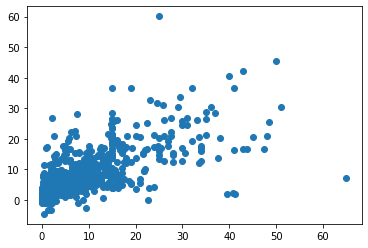

In [82]:
from matplotlib import pyplot as plt
plt.scatter(Y_test,y_pred_full)

Regression Model

In [102]:
lambdaRange = range(1,100)
bestRsq = 0.0                                                # To contain the best R^2.
bestLambda = 0.0                                             # To contain the best lambda.
for aLambda in lambdaRange:
    lasso = Lasso(aLambda)
    lasso.fit(X_train,Y_train)                               # Train with the training set.
    rsq = lasso.score(X_test,Y_test)                         # Calculate R^2 with the testing set.
    if (rsq > bestRsq):                                      # If R^2 is better, replace bestRsq.
        bestRsq = rsq
        bestLambda = aLambda
        print("Lambda = ", bestLambda, " and  R^2 = ", np.round(rsq,3))
lasso = Lasso(bestLambda)                                    # Final run with the bestLambda.
lasso.fit(X_train,Y_train)
y_pred_lasso=lasso.predict(X_test)

mean_absolute_error(Y_test,y_pred_lasso)


/var/folders/t6/nkv95bj97gv9j73w9bfk2p0r0000gn/T/ipykernel_19479/1510366411.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,Y_train)
/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.050e+04, tolerance: 2.371e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/

1.335900500581642

In [86]:
from sklearn.svm import SVR
regr = SVR(kernel="rbf",gamma='auto',C=10, epsilon=0.5, verbose=2)
regr.fit(X_train, Y_train)
regr.score(X_test, Y_test)


In [95]:
import statsmodels.api as sm
lm=sm.OLS(Y,X)
model=lm.fit()
y_pred_ols=model.predict(X_test)
mean_absolute_error(Y_test,y_pred_ols)

1.27464819189862